Evaluating SVM Kernels...


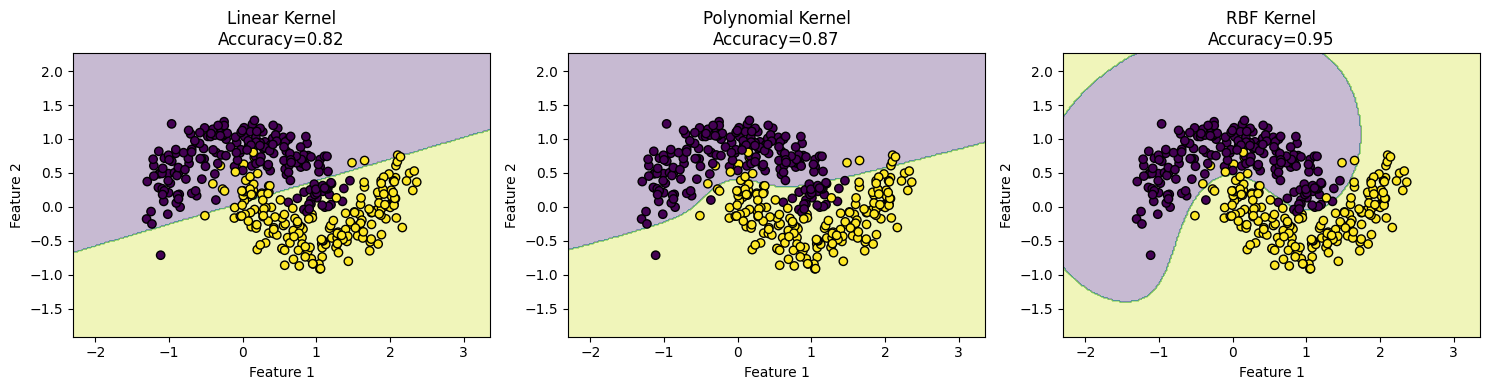


Kernel Performance:
Linear    : 0.825
Polynomial: 0.867
RBF       : 0.950

Hyperparameter Experiment (RBF Kernel)
---------------------------------------
C=0.1  gamma=0.01 -> Accuracy=0.767
C=0.1  gamma=0.1  -> Accuracy=0.808
C=0.1  gamma=1    -> Accuracy=0.925
C=1    gamma=0.01 -> Accuracy=0.817
C=1    gamma=0.1  -> Accuracy=0.833
C=1    gamma=1    -> Accuracy=0.950
C=10   gamma=0.01 -> Accuracy=0.817
C=10   gamma=0.1  -> Accuracy=0.883
C=10   gamma=1    -> Accuracy=0.958


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def load_data():
    X, y = datasets.make_moons(n_samples=400, noise=0.2, random_state=42)
    return train_test_split(X, y, test_size=0.3, random_state=42)

def train_svm(X_train, y_train, kernel='rbf', C=1.0, gamma='scale', degree=3):
   
    model = svm.SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
    model.fit(X_train, y_train)
    return model


def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")


def evaluate_kernels(X_train, X_test, y_train, y_test):
    """Train and evaluate different SVM kernels."""

    configs = [
        ("Linear", {'kernel': 'linear', 'C': 1}),
        ("Polynomial", {'kernel': 'poly', 'C': 1, 'degree': 3}),
        ("RBF", {'kernel': 'rbf', 'C': 1, 'gamma': 'scale'})
    ]

    plt.figure(figsize=(15, 4))

    results = []

    for i, (name, params) in enumerate(configs):
        model = train_svm(X_train, y_train, **params)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((name, acc))

        plt.subplot(1, 3, i + 1)
        plot_decision_boundary(model, np.vstack((X_train, X_test)),
                               np.hstack((y_train, y_test)),
                               f"{name} Kernel\nAccuracy={acc:.2f}")

    plt.tight_layout()
    plt.show()

    return results


def hyperparameter_experiments(X_train, X_test, y_train, y_test):

    C_values = [0.1, 1, 10]
    gamma_values = [0.01, 0.1, 1]

    print("\nHyperparameter Experiment (RBF Kernel)")

    for C in C_values:
        for gamma in gamma_values:
            model = train_svm(X_train, y_train, kernel='rbf', C=C, gamma=gamma)
            acc = accuracy_score(y_test, model.predict(X_test))
            print(f"C={C:<4} gamma={gamma:<4} -> Accuracy={acc:.3f}")


def main():
    X_train, X_test, y_train, y_test = load_data()

    print("Evaluating SVM Kernels...")
    results = evaluate_kernels(X_train, X_test, y_train, y_test)

    print("\nKernel Performance:")
    for name, acc in results:
        print(f"{name:<10}: {acc:.3f}")

    hyperparameter_experiments(X_train, X_test, y_train, y_test)


if __name__ == "__main__":
    main()
